### Introdução

1. A ideia da nossa solução é prever quais variáveis influenciam o sucesso de um filme e em que sentido e proporção
2. Vamos trabalhar, agora, com 2 scripts e, posteriormente, mais 2.
3. Nessa primeira fase, vamos construir o script de tratamento da bas;e o de análise exploratória.
4. Em uma segunda fase, vamos construir o script de feature engineering e pré-processamento de dados; e o da modelagem (Machine Learning)
5. Só depois disso pensaremos no deploy

### Bibliotecas

Vamos importar todas as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import warnings
from pprint import pprint

warnings.simplefilter(action='ignore', category=FutureWarning)
# Configurar o Plotly como o backend para os gráficos
pd.options.plotting.backend = "matplotlib"
# Configurar a opção para mostrar todas as colunas
pd.set_option('display.max_columns', None)
# Alterar as opções de exibição do pandas
pd.options.display.float_format = '{:.2f}'.format
# Configurar para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# Configurar para mostrar todas as linhas do dataframe
pd.set_option('display.max_rows', None)

### 0. Importação dos dados

Importando a base de filmes

In [ ]:
df_filmes = pd.read_csv("df_filmes.csv")

In [ ]:
# Visualizando as colunas e duas primeiras linhas
df_filmes.head(2)

,Film,Rotten Tomatoes % critics,Metacritic % critics,Average critics %,Rotten Tomatoes Audience %,Metacritic Audience %,Rotten Tomatoes vs Metacritic % deviance,Average audience %,Audience vs Critics deviance %,Primary Genre,Genres,Script Type,Opening weekend ($million),Opening Weekend,Domestic gross ($million),Domestic Gross,Foreign Gross ($million),Foreign Gross,Worldwide Gross,Worldwide Gross ($million),% of Gross earned abroad,Budget ($million),% Budget recovered,% Budget recovered opening weekend,Year_x,Oscar Winners,Oscar Detail,Link,Rank,Title,Genre,Description,Director,Actors,Year_y,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,Lion,87.00,68.00,77.50,92.00,72.0,20,82,-4.5,Drama,Drama,adaptation,0.12,123360.00,7.19,7187095.00,3.15,3150000,10337095.00,10.34,0.30,-,-,-%,2016.00,NaN,NaN,https://www.amazon.com/Lion-Dev-Patel/dp/B01NH...,19.00,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016.00,118.00,8.10,102061.00,51.69,69.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,No Escape,46.00,38.00,42.00,67.00,65.0,2,66,-24,action,action,original screenplay,8.11,8111264.00,27.20,27203371.00,27.13,27130000,54333371.00,54.33,0.50,0.45,120.7408244,18.02503111,2015.00,NaN,NaN,http://www.amazon.com/gp/product/B016Z411SE/?t...,924.00,No Escape,"Action,Thriller","In their new overseas home, an American family...",John Erick Dowdle,"Lake Bell, Pierce Brosnan, Owen Wilson,Chatcha...",2015.00,103.00,6.80,57921.00,27.29,38.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### 1. Tratamento

In [ ]:
# Corrigindo a grafia da coluna "Aniimation" para "Animation"
df_filmes.rename(columns={"Aniimation": "Animation"}, inplace=True)

In [ ]:
# Verificando quantas linhas e colunas existem na base
display(df_filmes.shape)

# Verificanto o tipo de cada variável
dict(df_filmes.dtypes)

(506, 61)

{'Film': dtype('O'),
 'Rotten Tomatoes % critics': dtype('float64'),
 'Metacritic % critics': dtype('float64'),
 'Average critics %': dtype('float64'),
 'Rotten Tomatoes Audience %': dtype('float64'),
 'Metacritic Audience %': dtype('O'),
 'Rotten Tomatoes vs Metacritic % deviance': dtype('O'),
 'Average audience %': dtype('O'),
 'Audience vs Critics deviance %': dtype('O'),
 'Primary Genre': dtype('O'),
 'Genres': dtype('O'),
 'Script Type': dtype('O'),
 'Opening weekend ($million)': dtype('float64'),
 'Opening Weekend': dtype('float64'),
 'Domestic gross ($million)': dtype('float64'),
 'Domestic Gross': dtype('float64'),
 'Foreign Gross ($million)': dtype('float64'),
 'Foreign Gross': dtype('int64'),
 'Worldwide Gross': dtype('float64'),
 'Worldwide Gross ($million)': dtype('float64'),
 '% of Gross earned abroad': dtype('float64'),
 'Budget ($million)': dtype('O'),
 '% Budget recovered': dtype('O'),
 '% Budget recovered opening weekend': dtype('O'),
 'Year_x': dtype('float64'),
 'Osc

In [ ]:
# Existem algumas linhas cujo valor não é numérico em colunas que deveriam ser numéricas, vamos alterá-lo para zero
df_filmes['% Budget recovered'].replace('-',0,inplace=True)
df_filmes['Metacritic Audience %'].replace('-',0,inplace=True)
df_filmes['Rotten Tomatoes vs Metacritic % deviance'].replace('-',0,inplace=True)
df_filmes['Average audience %'].replace('-',0,inplace=True)
df_filmes['Audience vs Critics deviance %'].replace('-',0,inplace=True)
df_filmes['Budget ($million)'].replace('-',0,inplace=True)
df_filmes['% Budget recovered opening weekend'].replace('-%',0,inplace=True)

In [ ]:
# Agora sim podemos alterar o tipo dessas colunas
list_var = []
def convert_dtype_int(base: pd.DataFrame, list_var: list) -> pd.DataFrame:
    """
    Converte o tipo de dados de uma ou mais variáveis de uma base de dados para float.

    Parâmetros:
    - base: pandas DataFrame contendo a base de dados que será modificada.
    - list_var: lista contendo os nomes das variáveis que terão seu tipo de dados convertido.

    Retorno:
    - pandas DataFrame contendo a base de dados com as variáveis especificadas convertidas para o tipo de dados float.
    """

    for var in list_var:
        base[var] = base[var].astype(float)

    return base

df_filmes = convert_dtype_int(df_filmes, ['% Budget recovered', 'Metacritic Audience %',
       'Rotten Tomatoes vs Metacritic % deviance', 'Average audience %',
       'Audience vs Critics deviance %', 'Budget ($million)',
       '% Budget recovered opening weekend'])

In [ ]:
# visualizando as nossas colunas
df_filmes.columns

Index(['Film', 'Rotten Tomatoes % critics', 'Metacritic % critics',
       'Average critics %', 'Rotten Tomatoes Audience %',
       'Metacritic Audience %', 'Rotten Tomatoes vs Metacritic % deviance',
       'Average audience %', 'Audience vs Critics deviance %', 'Primary Genre',
       'Genres', 'Script Type', 'Opening weekend ($million)',
       'Opening Weekend', 'Domestic gross ($million)', 'Domestic Gross',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', '% of Gross earned abroad',
       'Budget ($million)', '% Budget recovered',
       '% Budget recovered opening weekend', 'Year_x', 'Oscar Winners',
       'Oscar Detail', 'Link', 'Rank', 'Title', 'Genre', 'Description',
       'Director', 'Actors', 'Year_y', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror',

In [ ]:
# Calcule a contagem de valores ausentes em cada coluna em %
(100*df_filmes.isna().sum()/df_filmes.shape[0])

Film                                        0.00
Rotten Tomatoes % critics                   0.00
Metacritic % critics                        0.00
Average critics %                           0.00
Rotten Tomatoes Audience %                  0.00
Metacritic Audience %                       0.00
Rotten Tomatoes vs Metacritic % deviance    0.00
Average audience %                          0.00
Audience vs Critics deviance %              0.00
Primary Genre                               0.00
Genres                                      0.00
Script Type                                 0.00
Opening weekend ($million)                  0.00
Opening Weekend                             0.00
Domestic gross ($million)                   0.00
Domestic Gross                              0.00
Foreign Gross ($million)                    0.00
Foreign Gross                               0.00
Worldwide Gross                             0.00
Worldwide Gross ($million)                  0.00
% of Gross earned ab

<Axes: >

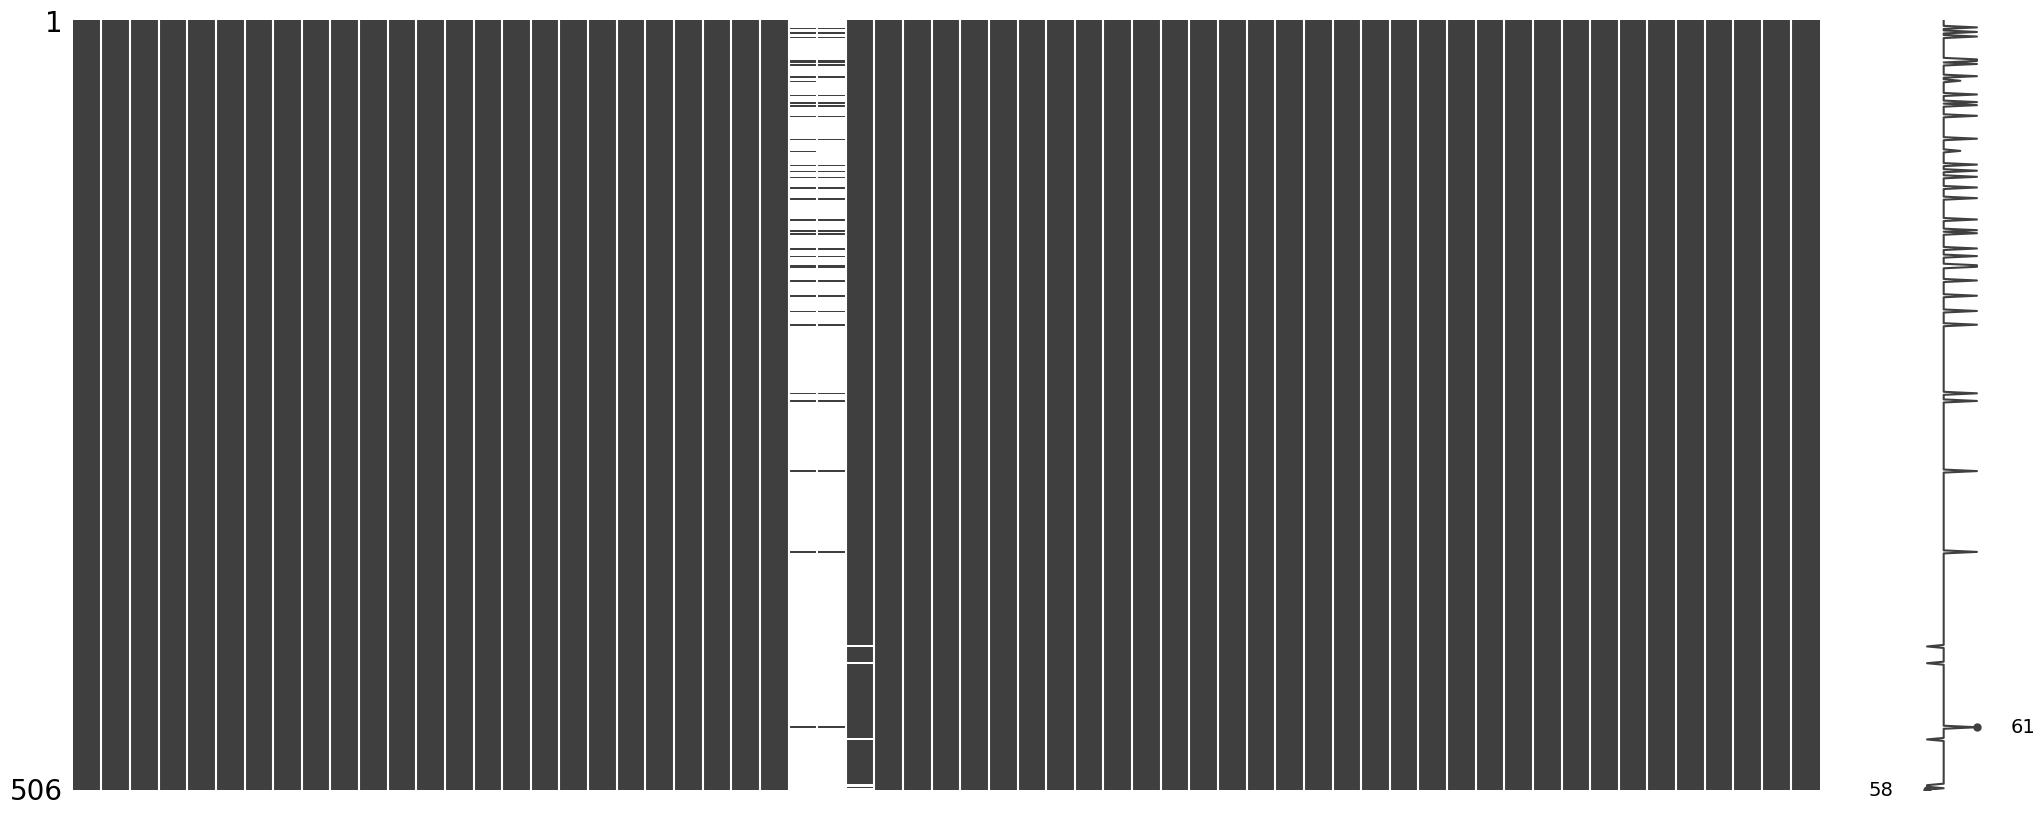

In [ ]:
# Vamos visualizar os valores faltantes
import missingno as msno
msno.matrix(df_filmes)

A coluna de Oscar possui muitos valores ausentes pois os filmes que não ganharam Oscar estão com NaN, então vamos inputar 0 nos valores nulos, indicando que não foram ganhadores de Oscar

In [ ]:
# Supondo que você tenha o dataframe df_filmes com as colunas "Oscar Winners" e "Oscar Detail"
# Preenchendo os valores ausentes das colunas com o valor 0
df_filmes["Oscar Winners"].fillna(0, inplace=True)
df_filmes["Oscar Detail"].fillna(0, inplace=True)

In [ ]:
# vamos trocar o valor Oscar Winner (string) para 1 (numérico)
df_filmes["Oscar Winners"].replace('Oscar Winner', 1, inplace=True)

In [ ]:
# descrevendo os tipos de gêneros
df_filmes["Genres"].describe()

count       506
unique      191
top       Drama
freq         27
Name: Genres, dtype: object

In [ ]:
# Contando quantos filmes têm em cada gênero
df_filmes["Genres"].value_counts()

Drama                                                                                         27
Comedy                                                                                        26
comedy                                                                                        25
drama                                                                                         22
thriller                                                                                      21
Adventure                                                                                     17
Action                                                                                        15
comedy, romance                                                                               15
action, adventure, sci-fi                                                                     11
horror                                                                                        10
action                        

Verificando se todas as colunas de Genero estão preenchidas com pelo menos um valor 1. Dessa forma podemos dropar a coluna de generos padrão

In [ ]:
# Lista com o nome das colunas relacionadas a gêneros de filmes
colunas_generos = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family",
                   "Fantasy", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi",
                   "Sport", "Thriller", "War", "Western"]

# Verificando se em todas as colunas de gênero pelo menos um valor é igual a 1
tem_pelo_menos_um_genero = df_filmes[colunas_generos].any(axis=1)


# Verificando se todos os valores são True
todos_os_generos_preenchidos = tem_pelo_menos_um_genero.all()

# Verificando o resultado
print(todos_os_generos_preenchidos)

True


Colocando a coluna Primary Genre generos em letras minusculas.


In [ ]:
# Convertendo os valores da coluna "Primary Genre" para letras minúsculas
df_filmes['Primary Genre'] = df_filmes['Primary Genre'].str.lower()
df_filmes['Genres'] = df_filmes['Genres'].str.lower()
df_filmes['Genre'] = df_filmes['Genre'].str.lower()

In [ ]:
# Descrevendo a variável gênero principal
df_filmes['Primary Genre'].describe()

count        506
unique        14
top       action
freq         163
Name: Primary Genre, dtype: object

In [ ]:
# Verificando nossas colunas
df_filmes.columns

Index(['Film', 'Rotten Tomatoes % critics', 'Metacritic % critics',
       'Average critics %', 'Rotten Tomatoes Audience %',
       'Metacritic Audience %', 'Rotten Tomatoes vs Metacritic % deviance',
       'Average audience %', 'Audience vs Critics deviance %', 'Primary Genre',
       'Genres', 'Script Type', 'Opening weekend ($million)',
       'Opening Weekend', 'Domestic gross ($million)', 'Domestic Gross',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', '% of Gross earned abroad',
       'Budget ($million)', '% Budget recovered',
       '% Budget recovered opening weekend', 'Year_x', 'Oscar Winners',
       'Oscar Detail', 'Link', 'Rank', 'Title', 'Genre', 'Description',
       'Director', 'Actors', 'Year_y', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror',

Como não sabemos como a variável "Success" foi calculada na base, vamos construir a nossa própria

In [ ]:
# Transforme a coluna em float
df_filmes['% Budget recovered'] = df_filmes['% Budget recovered'].astype(float)

# Recalcule a variável Sucesso. Todo filme que tiver obtido 2% ou mais de lucro E tiver uma média da crítica igual ou superior a 75 será considerado um filme de sucesso
df_filmes['sucesso_recalculado'] = np.where(((df_filmes['% Budget recovered'] >= 2) & (df_filmes['Average critics %'] >= 75)), 1, 0)

# Conte os valores em cada grupo. Veja que o dataset estará desbalanceado, então no modelo de ML teremos que avaliar as condições sobre isso
df_filmes['sucesso_recalculado'].value_counts()

0    382
1    124
Name: sucesso_recalculado, dtype: int64

In [ ]:
#Vamos alterar o tipo das variáveis dummy para string
list_var = []
def convert_dtype_category(base: pd.DataFrame, list_var: list) -> pd.DataFrame:
    """
    Converte o tipo de dados de uma ou mais variáveis de uma base de dados para categórico.

    Parâmetros:
    - base: pandas DataFrame contendo a base de dados que será modificada.
    - list_var: lista contendo os nomes das variáveis que terão seu tipo de dados convertido.

    Retorno:
    - pandas DataFrame contendo a base de dados com as variáveis especificadas convertidas para o tipo de dados categórico.
    """

    for var in list_var:
        base[var] = base[var].astype(str)

    return base

df_filmes = convert_dtype_category(df_filmes, ['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Success', 'sucesso_recalculado'])

In [ ]:
# Veja que existem duas colunas de ano. Vamos ficar só com uma e excluir a outra
df_filmes['ano'] = df_filmes['Year_x']
df_filmes.drop(['Year_x', 'Year_y'], axis=1, inplace=True)

In [ ]:
# existem espaços a mais nos valores da variável 'Script Type'. Vamos deletar esses espaços
df_filmes['Script Type'] = df_filmes['Script Type'].str.rstrip()

### Salve os dados para usar na etapa de análise exploratória

In [ ]:
df_filmes.to_csv('df_filmes_tratada.csv',index=False)